<a href="https://colab.research.google.com/github/ameyakj/Retail-Price-Optimization/blob/main/RetailPj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

#lOAD THE DATASET
df=pd.read_csv("/content/retail_price.csv")

In [ ]:

#reading first five rows of the dataset
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [ ]:

#SANITY CHECK UP
#Find the shape of the dataset
df.shape

(676, 30)

In [ ]:

#Finding Information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [ ]:

#Finding NULL or missing values in the data
df.isnull().sum()

,0
product_id,0
product_category_name,0
month_year,0
qty,0
total_price,0
freight_price,0
unit_price,0
product_name_lenght,0
product_description_lenght,0
product_photos_qty,0


In [ ]:

#Finding Duplicate values in the data
df.duplicated().sum()

0

In [ ]:

#Finding the garbage data
for i in df.select_dtypes(include="object").columns:
  print(df.value_counts())

product_id  product_category_name  month_year  qty  total_price  freight_price  unit_price  product_name_lenght  product_description_lenght  product_photos_qty  product_weight_g  product_score  customers  weekday  weekend  holiday  month  year  s          volume  comp_1  ps1  fp1        comp_2  ps2  fp2        comp_3      ps3  fp3        lag_price
bed1        bed_bath_table         01-01-2018  19   759.81       16.533684      39.99       39                   161                         2                   350               4.0            62         23       8        2        1      2018  17.757009  3800    86.90   3.9  19.383529  39.99   4.0  16.533684  39.990000   4.0  16.533684  39.99        1
health4     health_beauty          01-01-2018  15   448.50       9.551333       29.90       55                   388                         1                   250               4.5            98         23       8        2        1      2018  12.096774  1200    23.99   4.3  11.287368  89.99  

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


EDA

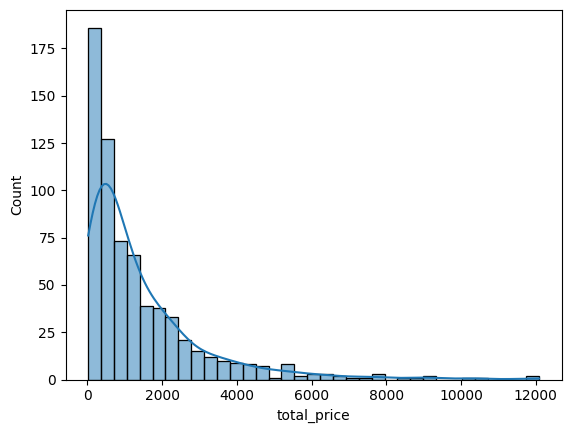

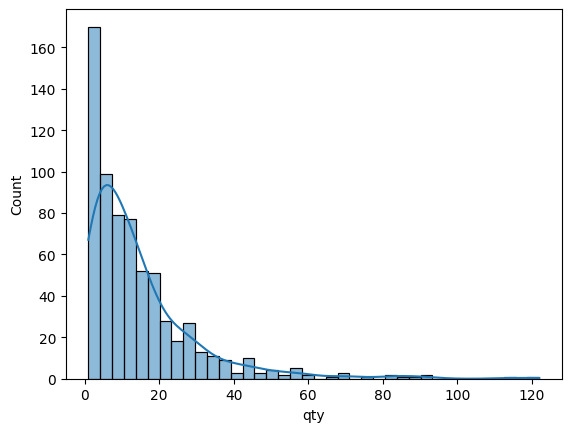

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of prices and quantities
sns.histplot(df['total_price'], kde=True)
plt.show()

sns.histplot(df['qty'], kde=True)
plt.show()

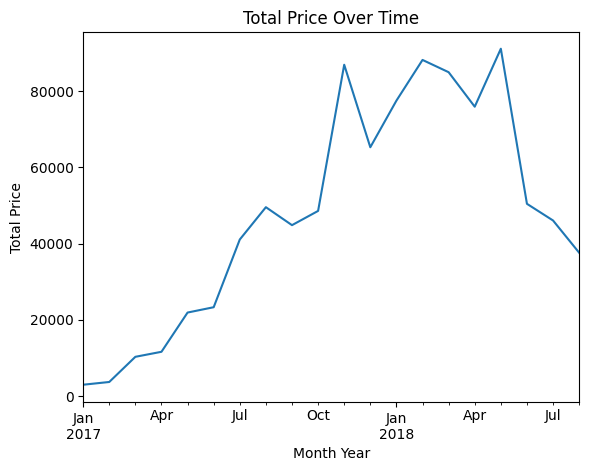

In [ ]:
# Convert 'month_year' to datetime format
df['month_year'] = pd.to_datetime(df['month_year'], format='%d-%m-%Y')

# Plot total_price over time
df.groupby('month_year')['total_price'].sum().plot()
plt.xlabel('Month Year')
plt.ylabel('Total Price')
plt.title('Total Price Over Time')
plt.show()

In [ ]:
df['price_per_unit'] = df['total_price'] / df['qty']

In [ ]:
df['month'] = df['month_year'].dt.month
df['year'] = df['month_year'].dt.year

ML model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Features and target
X = df[['qty', 'freight_price', 'comp_1', 'comp_2', 'comp_3']]
y = df['total_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 588015.9547741751


In [ ]:
pip install Flask pandas numpy scikit-learn

In [ ]:
import joblib

# Save the model
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pickle

# Load your dataset
df = pd.read_csv("retail_price.csv")

# Features and target
X = df[['qty', 'freight_price', 'comp_1', 'comp_2', 'comp_3']]
y = df['total_price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save the trained model
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!
